# Imports

In [11]:
import pandas as pd
import numpy as np

In [2]:
from backend import data_paths
from backend import evaluation_utils
from backend import gauge_groups_utils
from backend import loading_utils

# Full Gauge Group

In [3]:
gauges = gauge_groups_utils.get_full_gauge_group()
print(f'There are {len(gauges)} gauges.')

There are 5678 gauges.


# Record Lengths

In [4]:
attributes = loading_utils.load_attributes_file(gauges=gauges)

In [5]:
gauge_to_country_mapping = loading_utils.load_gauge_country_file()
gauge_to_country_mapping = gauge_to_country_mapping.loc[gauges]
countries = set(gauge_to_country_mapping['Country'])
print(f'There are {len(gauge_to_country_mapping)} gauges in {len(countries)} countries.')

There are 5678 gauges in 118 countries.


In [8]:
record_lengths_df = loading_utils.load_grdc_record_length_file()
record_length_country_df = pd.concat([gauge_to_country_mapping, record_lengths_df], axis=1)
record_lengths_by_country = record_length_country_df.groupby('Country')['Record Length'].sum()

# GDP Data

In [9]:
most_recent_gdp = loading_utils.load_gdp_file()
print(f'There are {len(most_recent_gdp)} countries with GDP data.')
print(f'Of those, {len(set(most_recent_gdp.index).intersection(set(countries)))} overlap with countries that have gauges.')

There are 266 countries with GDP data.
Of those, 117 overlap with countries that have gauges.


In [12]:
gdp_per_gauge = {}
for gauge in gauges:
    country = gauge_to_country_mapping.loc[gauge, 'Country']
    if country not in most_recent_gdp.index:
        print(country)
        continue
    gdp_per_gauge[gauge] = most_recent_gdp.loc[country]

gdp_per_gauge = pd.Series(gdp_per_gauge).rename('GDP')
log_gdp_per_gauge = np.log(gdp_per_gauge).rename('log GDP')

nan


In [13]:
# Use this commented code to find names of countries in the GDP dataset.
# [idx for idx in most_recent_gdp.index if 'lao' in idx.lower()]

# Plot Correlation

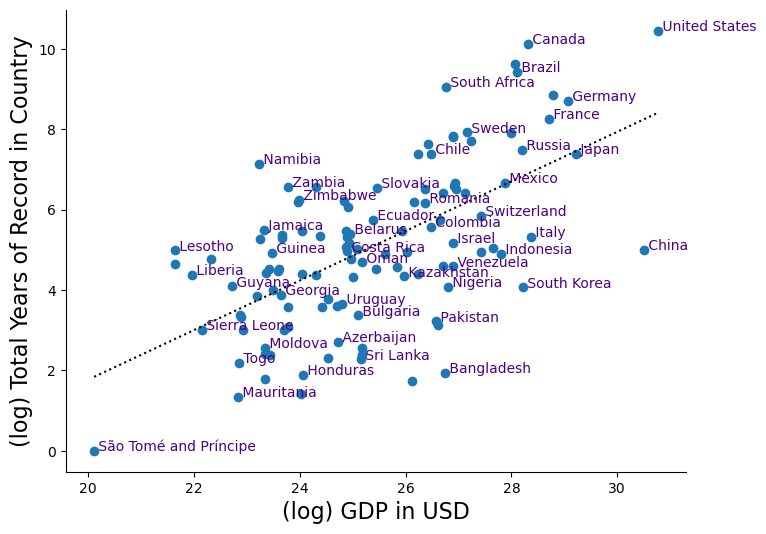

In [14]:
evaluation_utils.plot_gdp_gauge_record_correlation(
    most_recent_gdp,
    record_lengths_by_country,
    all_labels=False
)
evaluation_utils.save_figure(data_paths.GDP_GRDC_RECORD_LENGTH_CORRELATION_FILENAME)